In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Create Database Connection
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
# Establish Connection
conn = engine.connect()

In [6]:
# Create tables within the database
Base = declarative_base()
conn = engine.connect()
Base.metadata.create_all(conn)

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# Salaries = Base.classes.Salaries

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
station_df = pd.read_sql_table("station", conn)
station_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [12]:
measurement_df = pd.read_sql_table("measurement", conn)
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23')

In [14]:
# Calculate the date 1 year ago from the last data point in the database
# Query for the Dow closing price 1 week before 2011-04-08 using the datetime library
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [15]:
# Perform a query to retrieve the last 12 months of precipitation data 
precip_analysis = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").filter(Measurement.date <= "2017-08-23").all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_analysis_df = pd.DataFrame(precip_analysis)     
precip_analysis_df.set_index('date', inplace=True)

# Sort the dataframe by date
precip_analysis_df = precip_analysis_df.sort_index()


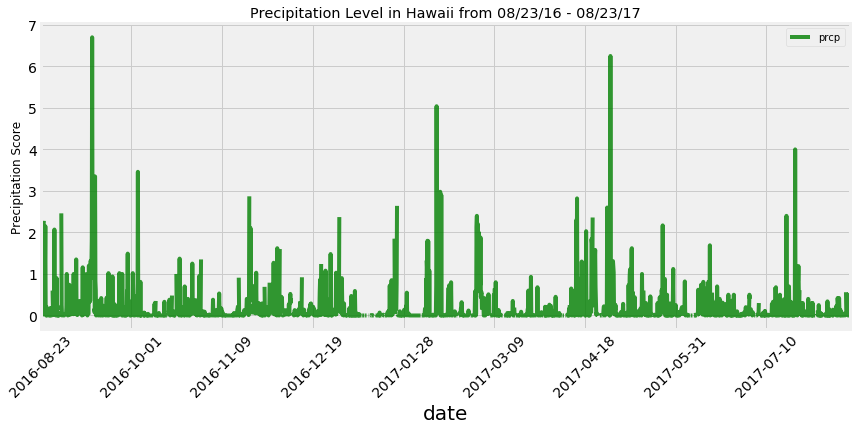

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_analysis_df.plot(color='green', alpha=0.8, figsize=(12, 6), rot=45, legend=True, sort_columns=True, grid=True, fontsize=14)

# Set a Title and labels
plt.title("Precipitation Level in Hawaii from 08/23/16 - 08/23/17")
plt.xlabel("Date")
plt.ylabel("Precipitation Score")

plt.tight_layout()
plt.xlabel('date', fontsize=20)

plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_analysis_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
number_of_station = session.query(func.count(Station.id)).all()
number_of_station

[(9)]

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram.
most_observed_station_temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= "2016-08-23").filter(Measurement.date <= "2017-08-23").filter(Measurement.station == "USC00519281").all()
most_observed_station_temp

# Save the query results as a Pandas DataFrame and set the index to the date column
most_observed_station_temp_df = pd.DataFrame(most_observed_station_temp) 
most_observed_station_temp_df.head()


,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


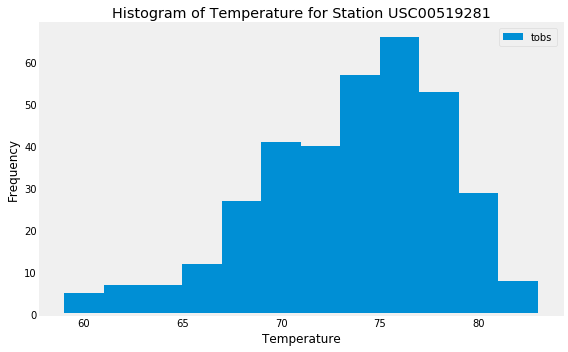

In [22]:
# Plot the result of last 12 months of temperature observation data for the station as a histogram.
most_observed_station_temp_df.plot(kind="hist", bins=12, figsize=(8, 5))

# Set a Title and labels
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature for Station USC00519281')

#Set a grid on the plot
plt.grid()
plt.tight_layout()

# Save the Figure
# plt.savefig("Images/Histogram of Employee Salaries.png")

# Show the figure
plt.show()

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
tmin_tavg_tmax  = calc_temps('2017-01-15', '2017-01-27')
print(tmin_tavg_tmax)

[(63.0, 71.26506024096386, 80.0)]


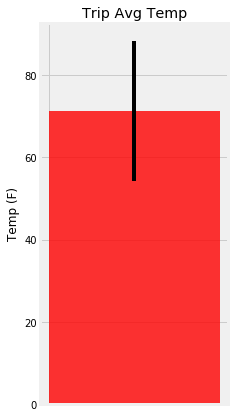

In [25]:
# Plot the results from your previous query as a bar chart. 
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=(3, 7))
plt.bar("", ((tmin_tavg_tmax[0])[1]),  yerr=(((tmin_tavg_tmax[0])[2])-((tmin_tavg_tmax[0])[0])), color='red', alpha=0.8, align="edge")

# Use the average temperature for the y value
plt.title("Trip Avg Temp")

# Use the average temperature for the y value
plt.ylabel("Temp (F)")

# Show the figure
plt.show()


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

trip_rainfall = ( 
    session.query(
        Station.station, 
        Station.name, 
        Station.latitude, 
        Station.longitude, 
        Station.elevation, 
        func.sum(Measurement.prcp)).
    filter(Measurement.date >= "2017-01-15").
    filter(Measurement.date <= "2017-01-27").
    group_by(Measurement.station).
    order_by(func.sum(Measurement.prcp).
    desc()).all()
)

trip_rainfall

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
start_date = '2017-01-15'
end_date = '2017-01-27'
# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
